<div class="alert alert-info"><b>Import Libraries<b>

In [17]:
from matplotlib import pyplot as plt
import json
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import stumpy
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
from collections import Counter
import urllib
import ssl
import io
import os
from kando import kando_client
import kando
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%run utils_dana.ipynb

<div class="alert alert-info"><b>Global Variables<b>

In [2]:
RESAMPLE = '5min'
WINDOW = 36
THRESHOLD = 0.05
POINT_ID = 2045
START = 2016

<div class="alert alert-info"><b>Connect to API and Load Data<b>

### Connect to API

In [3]:
client = connect()

### Load data

In [4]:
df_Train = client.get_all(point_id=POINT_ID, start=START)

Kando - GET /api/data/fetch?point_id=2045&unit_id=&start=2016&end=&raw_data=
Kando - GET /api/data/fetch?point_id=2045&unit_id=&start=1543816800&end=&raw_data=
Kando - GET /api/data/fetch?point_id=2045&unit_id=&start=1551307500&end=&raw_data=
Kando - GET /api/data/fetch?point_id=2045&unit_id=&start=1573277400&end=&raw_data=
Kando - GET /api/data/fetch?point_id=2045&unit_id=&start=1581095400&end=&raw_data=
Kando - GET /api/data/fetch?point_id=2045&unit_id=&start=1588677900&end=&raw_data=
Kando - GET /api/data/fetch?point_id=2045&unit_id=&start=1593918000&end=&raw_data=


### Create DataFrame

In [5]:
df = create_df(df_Train)
df.head()

PI      EC   PH     WL    ORP  TEMPERATURE  \
DateTime                                                                 
2018-09-05 03:10:00  28.142182  1312.0  6.9 -205.0 -466.0         28.4   
2018-09-05 03:15:00  28.556000  1328.0  6.8 -205.0 -466.0         28.3   
2018-09-05 03:20:00  28.572000  1336.0  6.8 -205.0 -465.0         28.3   
2018-09-05 03:25:00  28.588000  1344.0  6.8 -205.0 -465.0         28.3   
2018-09-05 03:30:00  28.620000  1360.0  6.8 -205.0 -464.0         28.3   

                     Battery  Signal  visit  
DateTime                                     
2018-09-05 03:10:00      0.0     0.0  False  
2018-09-05 03:15:00      0.0     0.0  False  
2018-09-05 03:20:00      0.0     0.0  False  
2018-09-05 03:25:00      0.0     0.0  False  
2018-09-05 03:30:00      0.0     0.0  False

### Relevant features

In [6]:
cols_to_plot = ['PI', 'EC', 'PH', 'ORP', 'TEMPERATURE']

Plotting on a full time-line (with optional resampling)

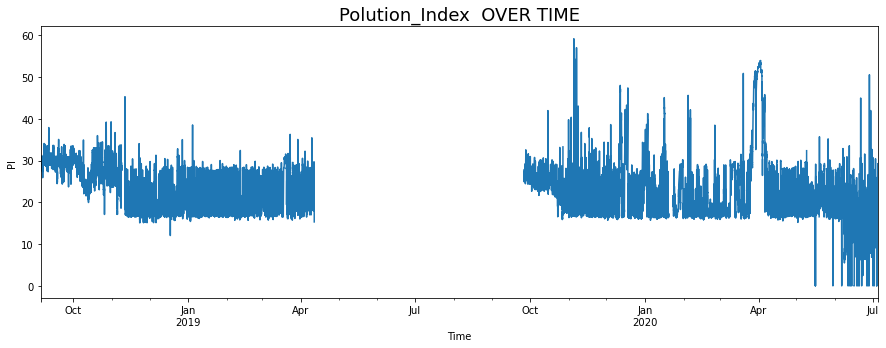

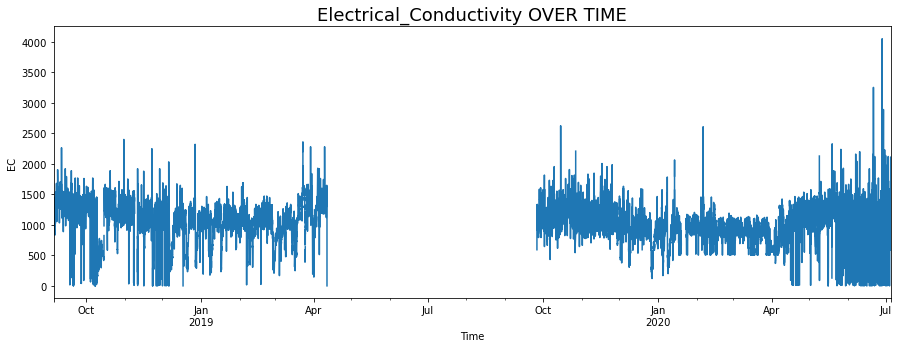

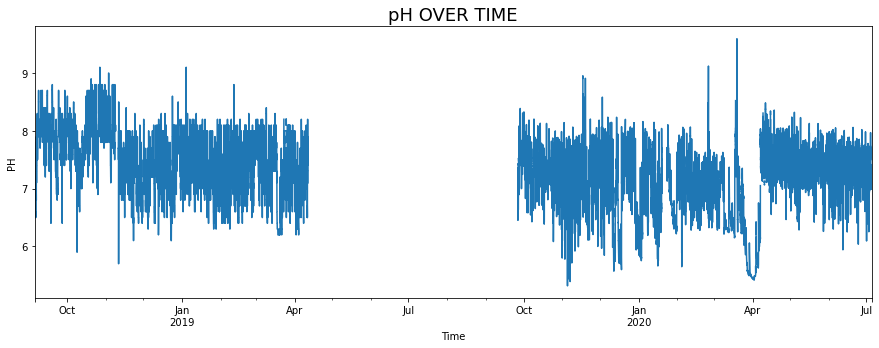

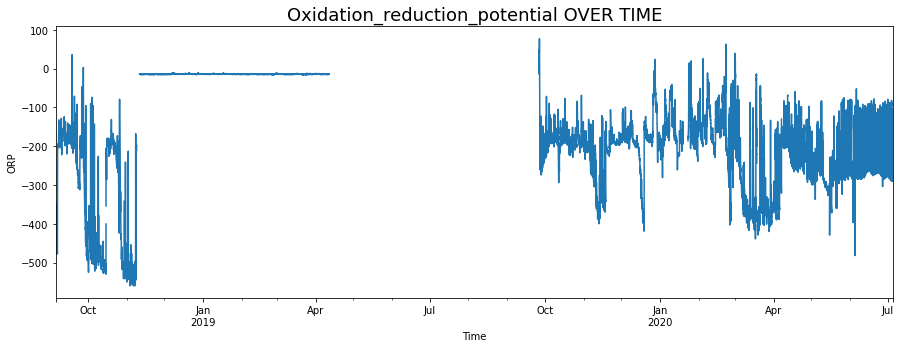

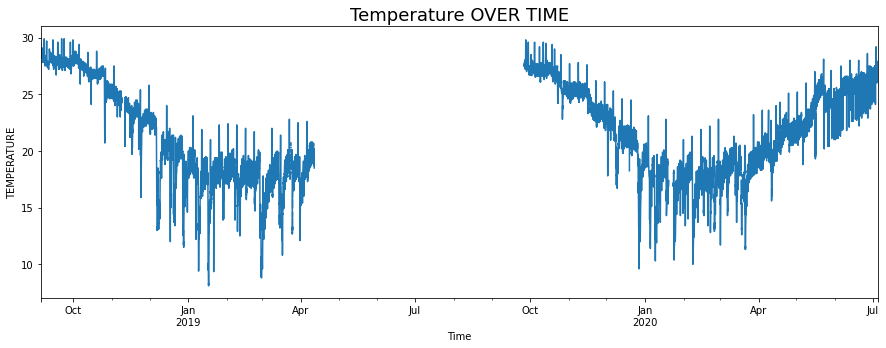

In [7]:
plot_columns(df, cols_to_plot, RESAMPLE)

Resampling the data, imputing nulls with time_interpolations and plotting

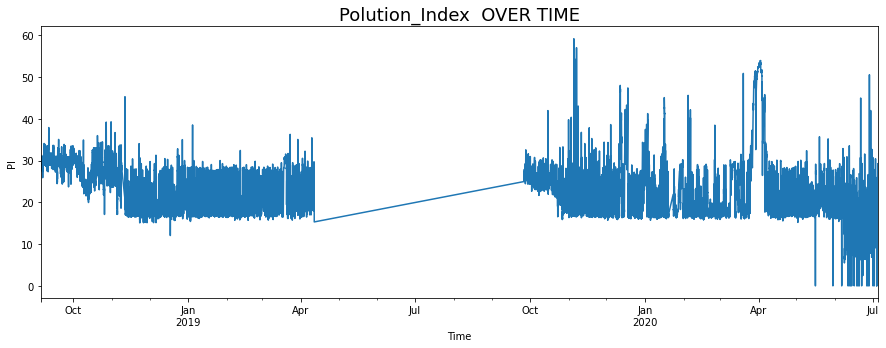

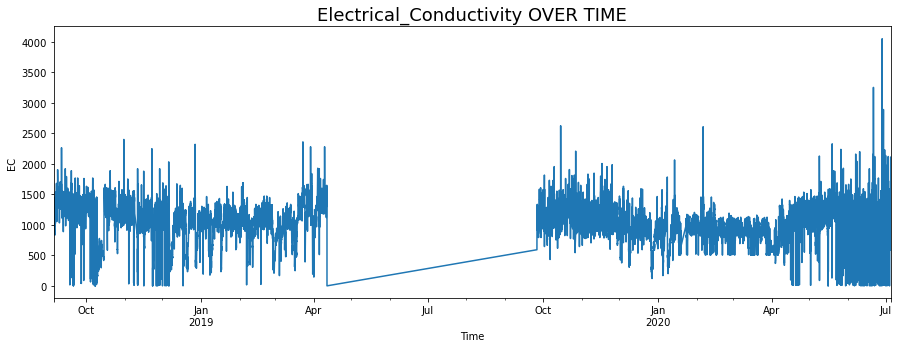

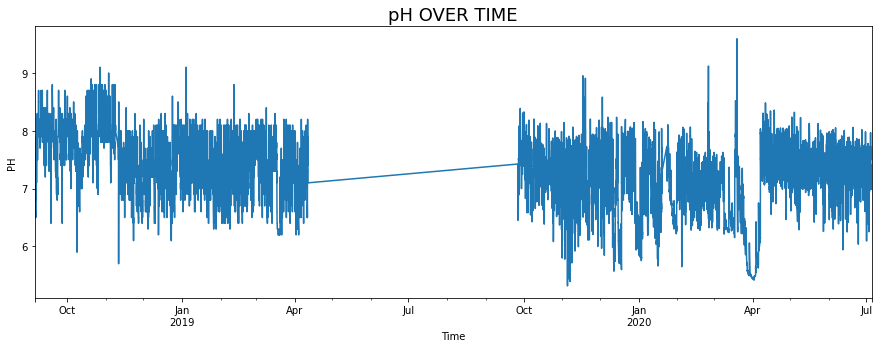

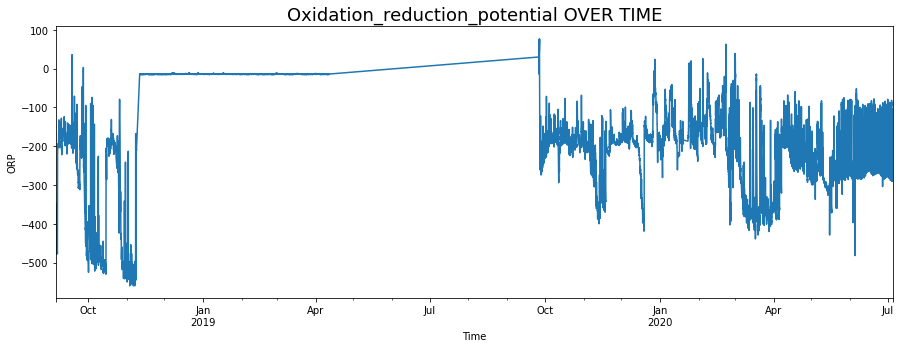

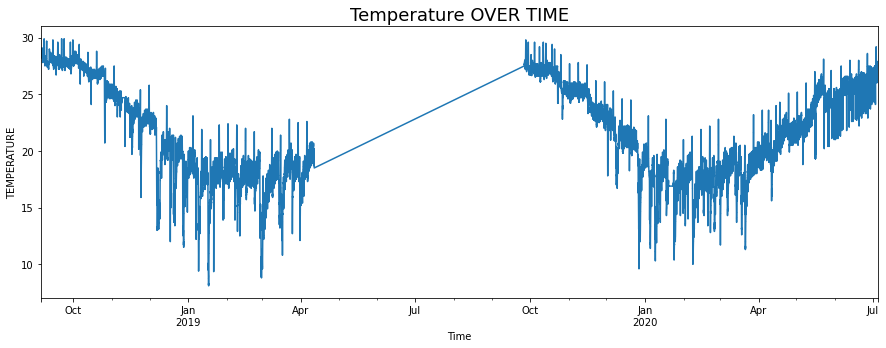

In [8]:
df = impute_nulls_with_time_interpolation(df, cols_to_plot, RESAMPLE)
plot_columns(df, cols_to_plot, RESAMPLE)

In [9]:
df = df.iloc[:1000]

In [10]:
df.shape

(1000, 9)

In [11]:
cols_for_matrix_profile = ['EC', 'PH', 'ORP', 'TEMPERATURE']
mps = create_matrix_profile_dictionary(df, cols_for_matrix_profile, m=WINDOW)

In [12]:
mps['mp_EC'].shape

(965, 4)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


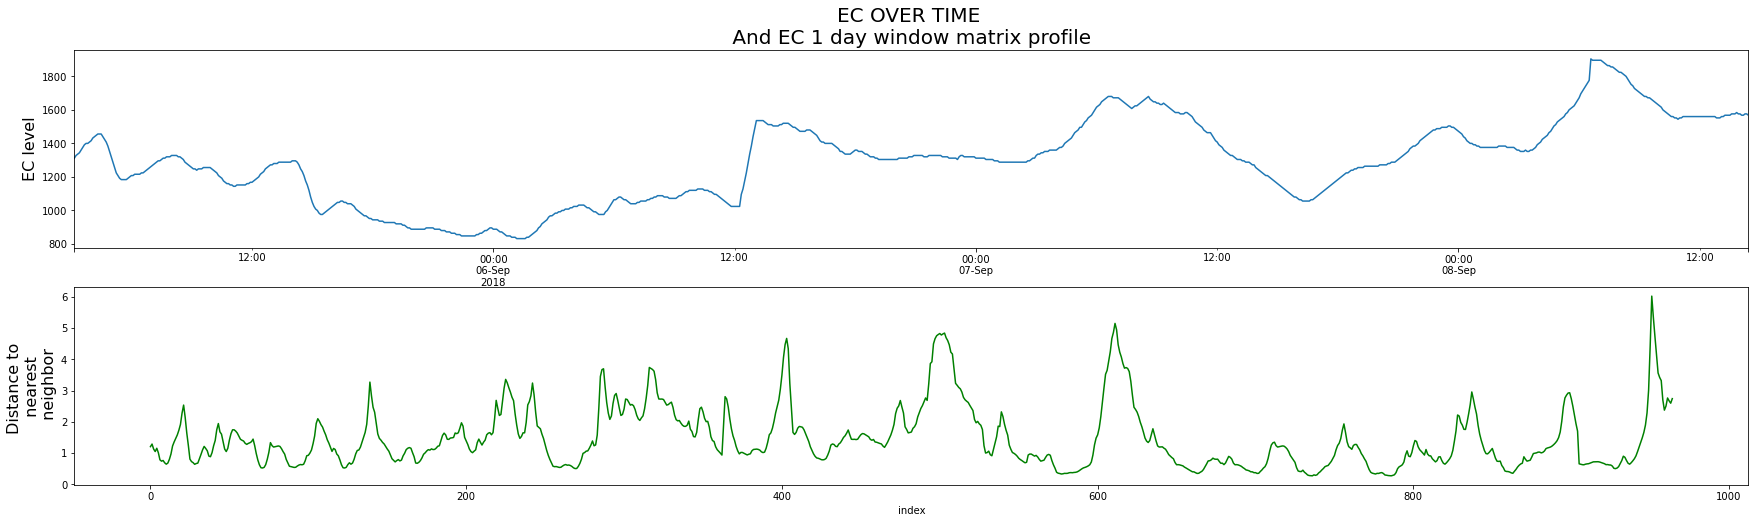

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


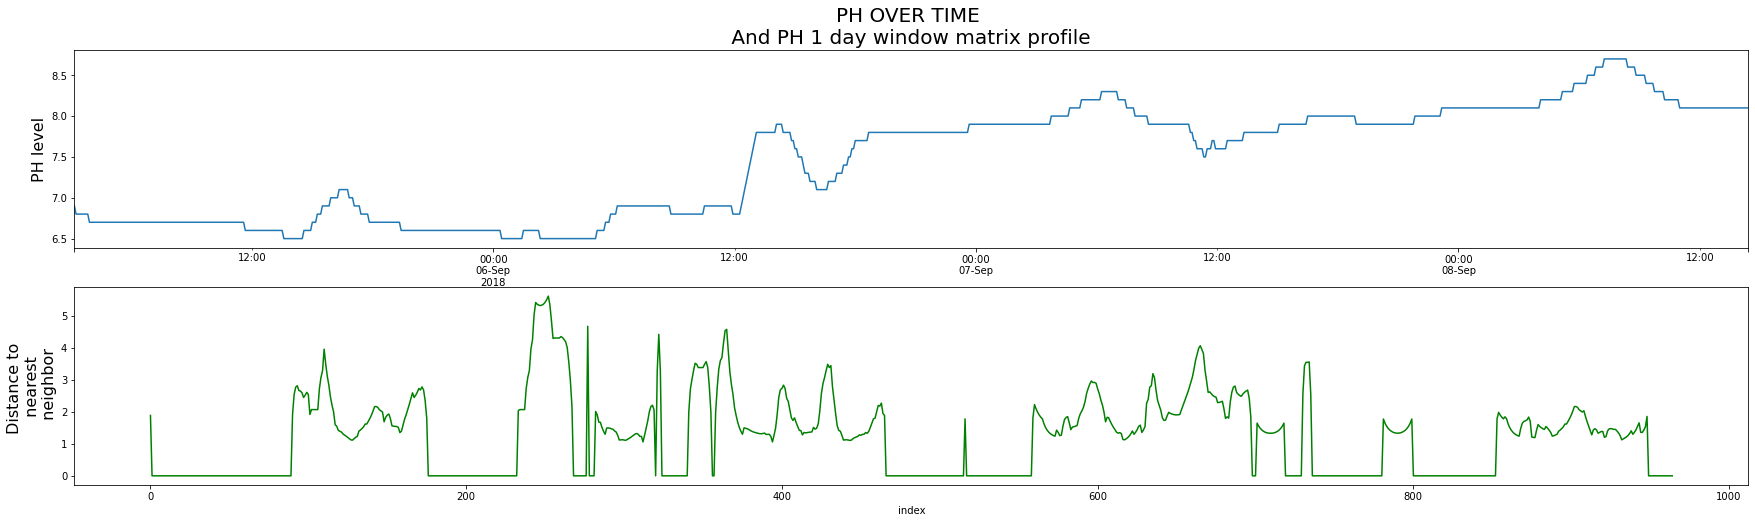

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


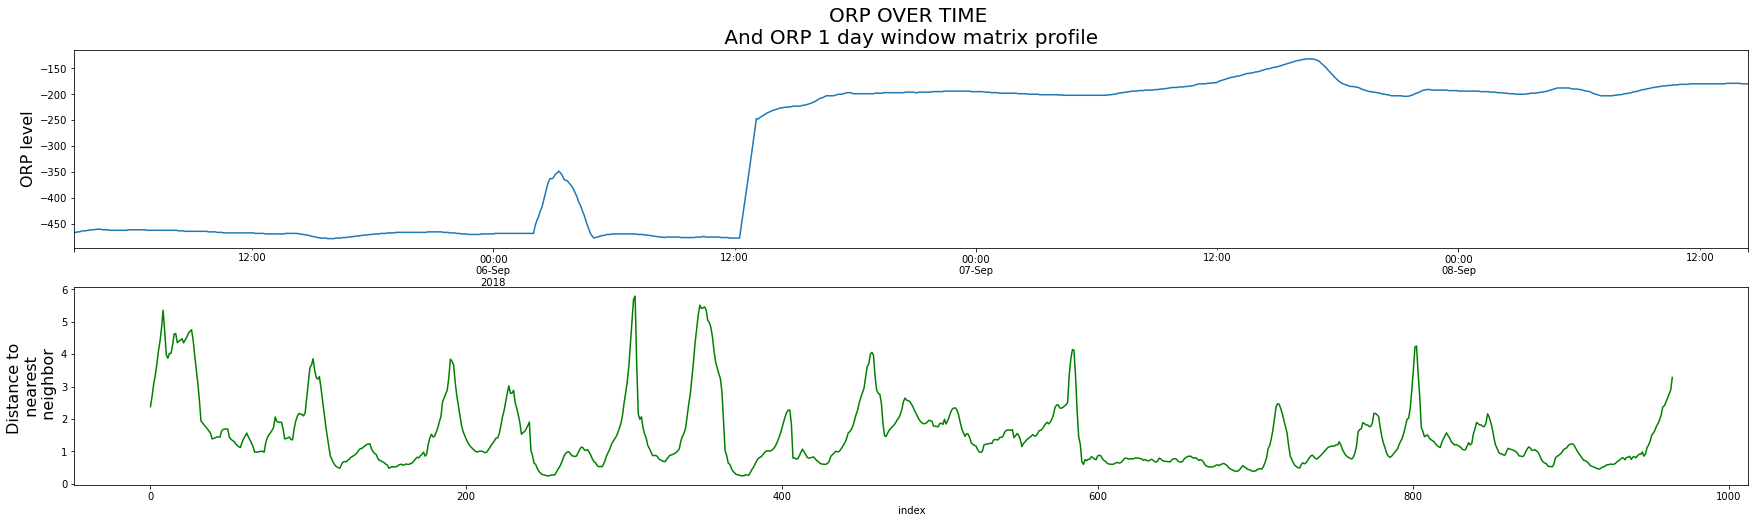

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


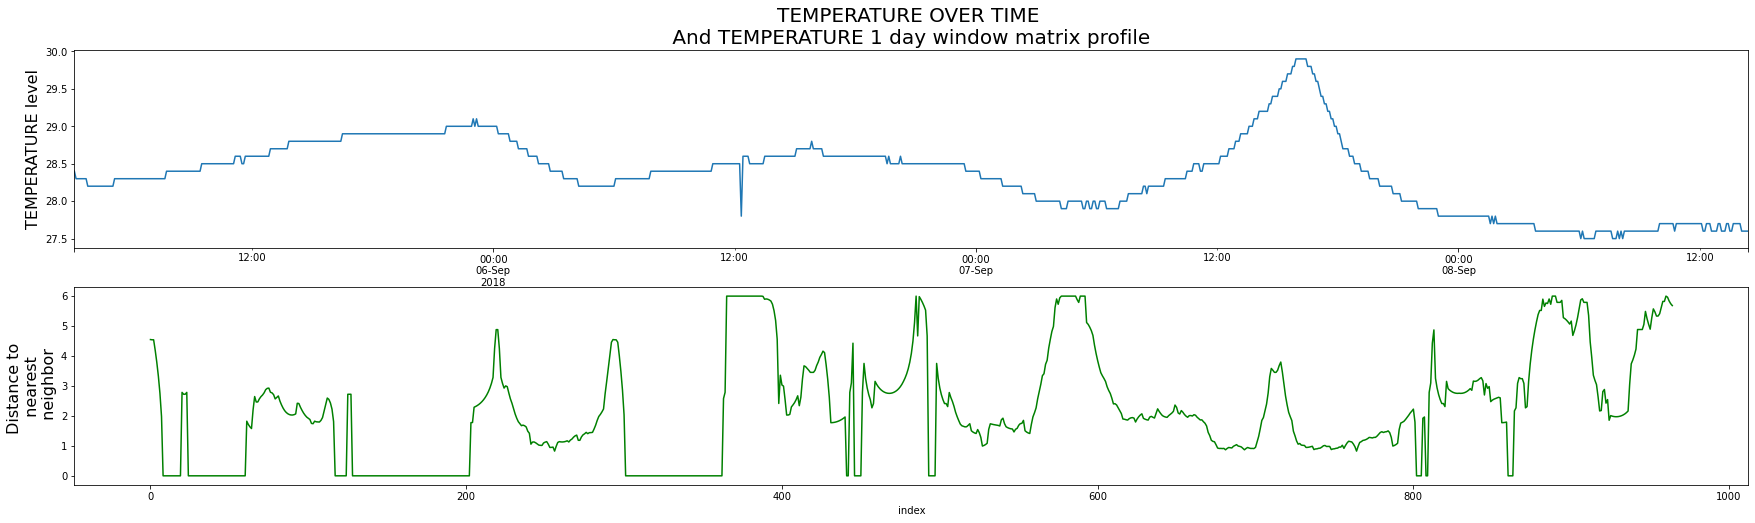

In [13]:
plot_univariant_matrix_profiles_dictionary(df, mps, cols_for_matrix_profile)

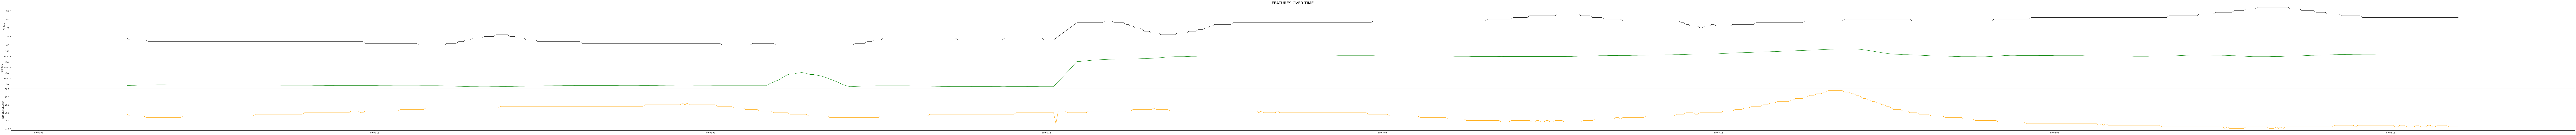

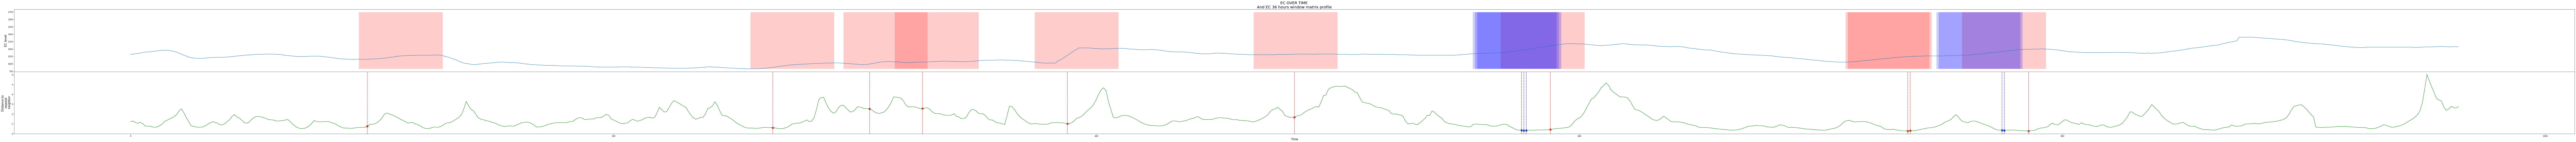

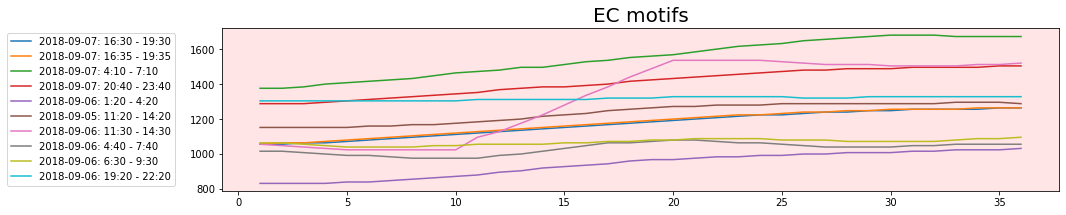

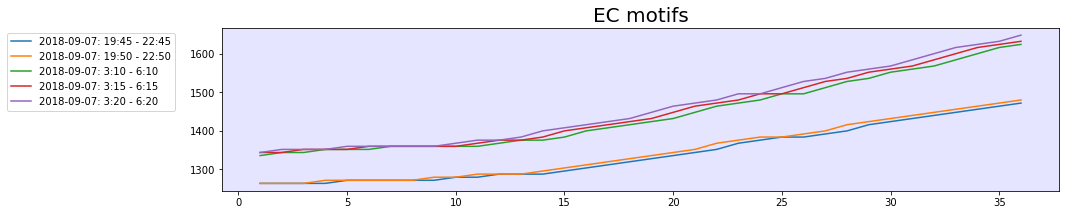

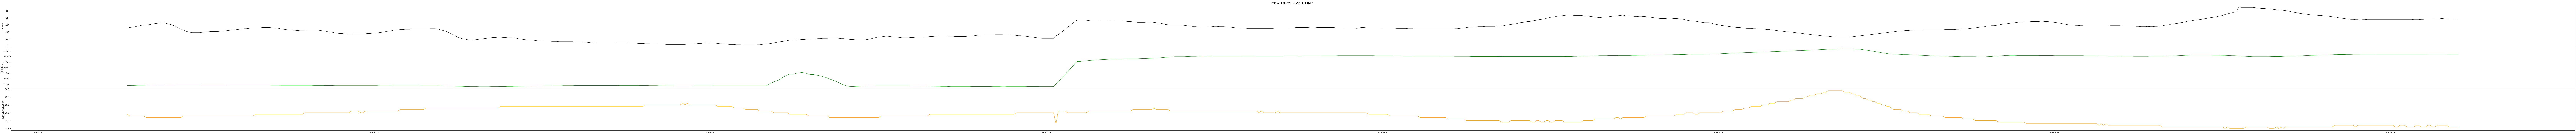

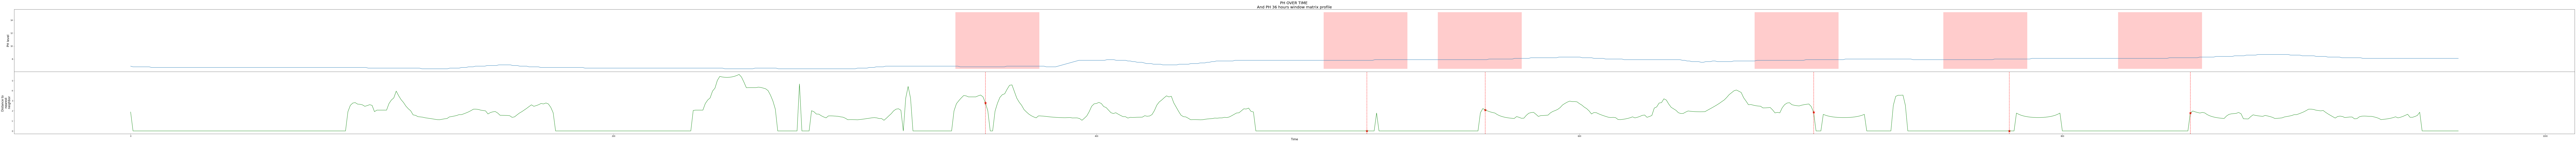

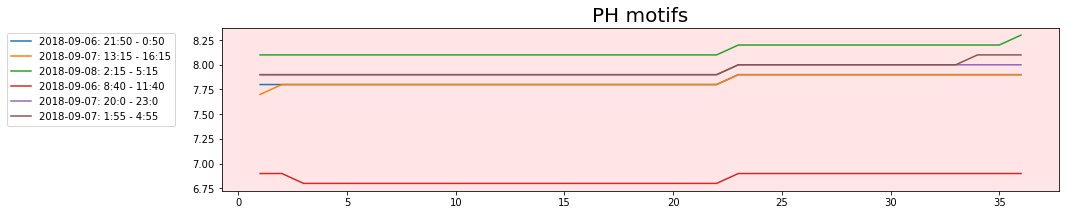

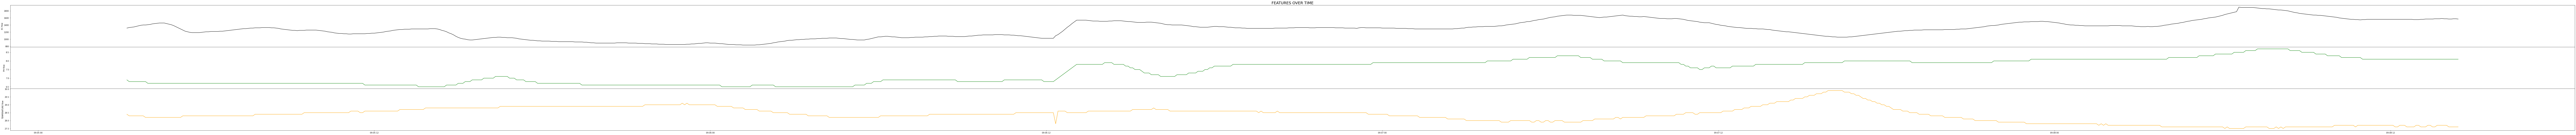

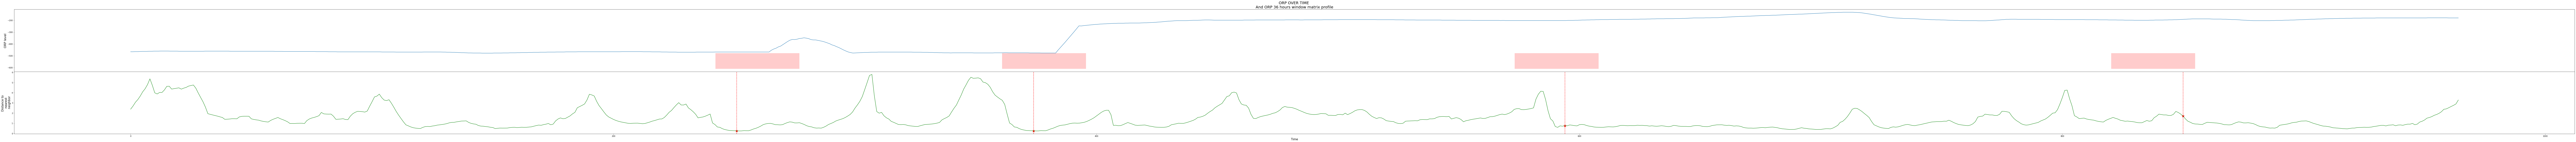

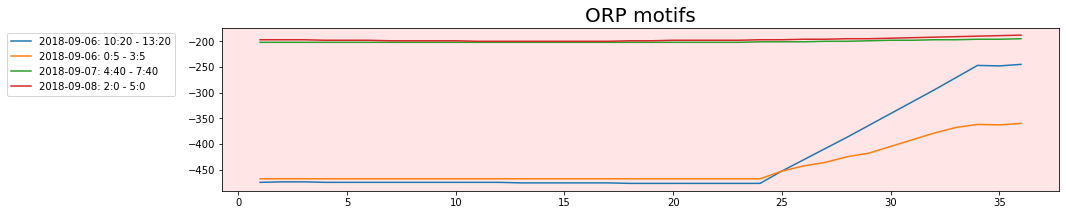

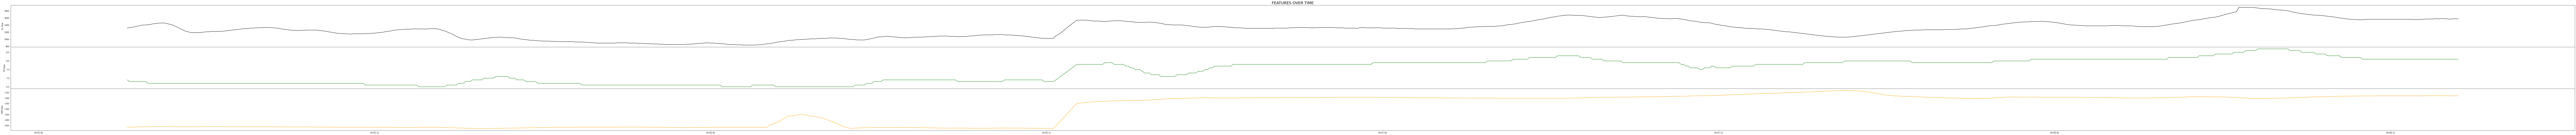

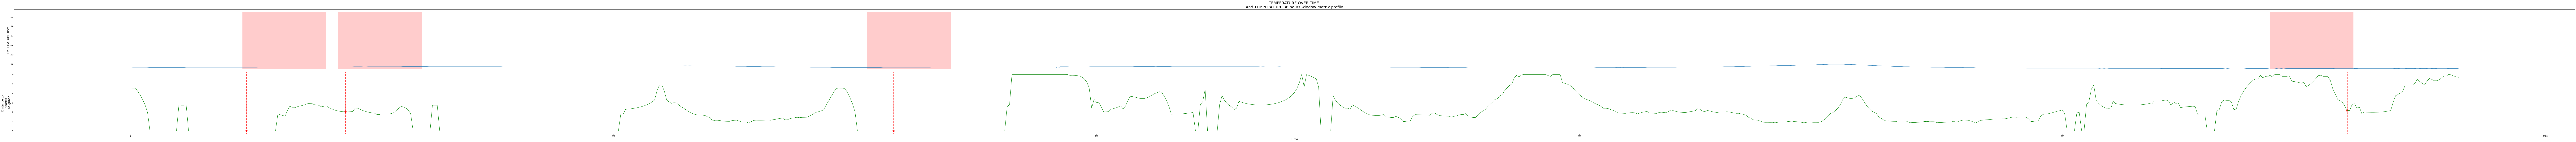

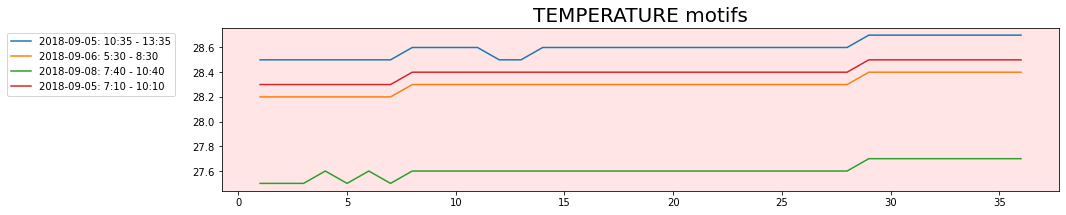

In [18]:
plot_univariant_matrix_profiles_and_motifs(df, mps, cols_for_matrix_profile, WINDOW, threshold=THRESHOLD)

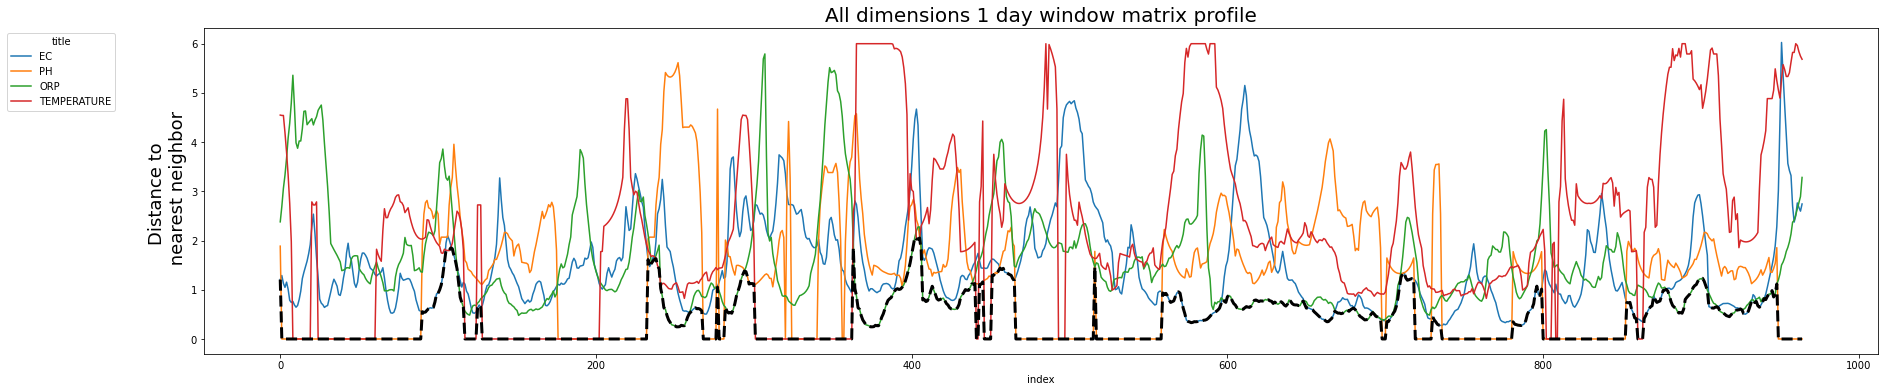

In [15]:
plot_multi_variant_matrix_profile(mps, cols_for_matrix_profile)

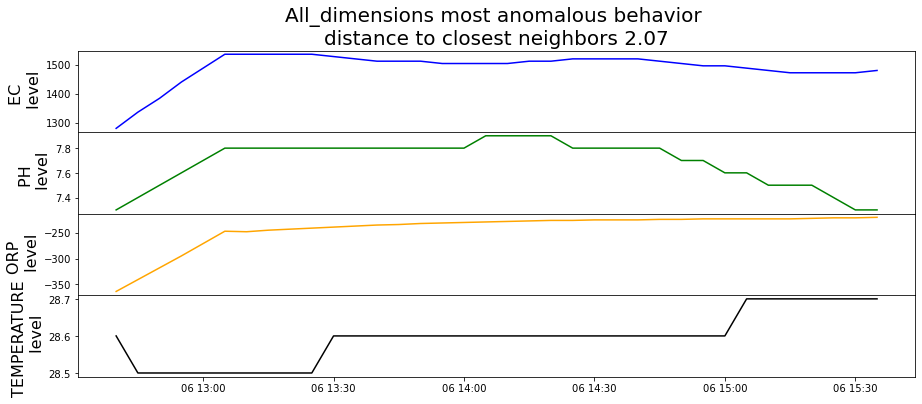

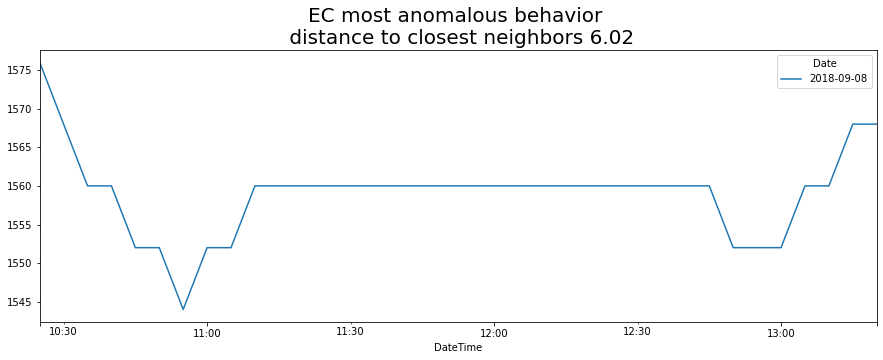

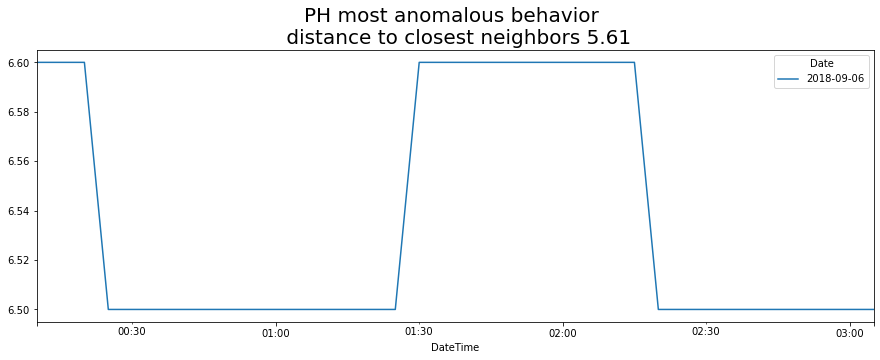

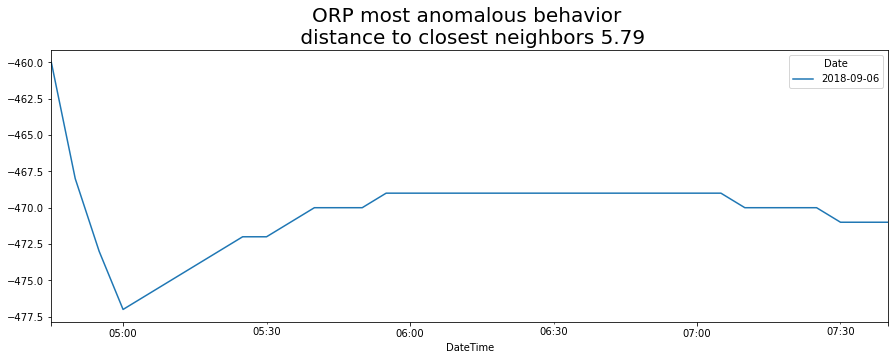

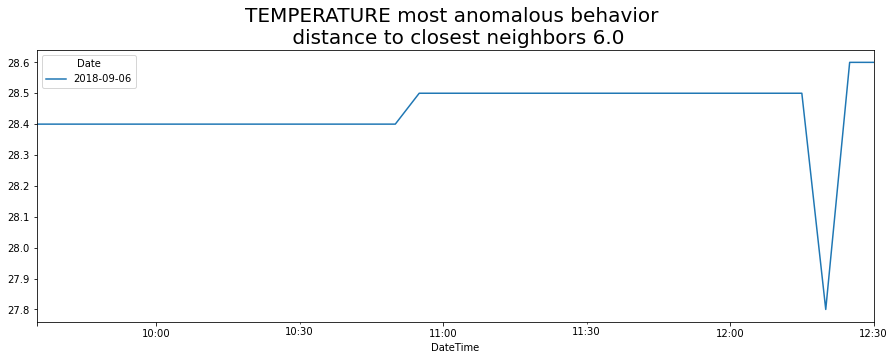

In [16]:
plot_anomalities(df, mps, cols_for_matrix_profile, WINDOW)

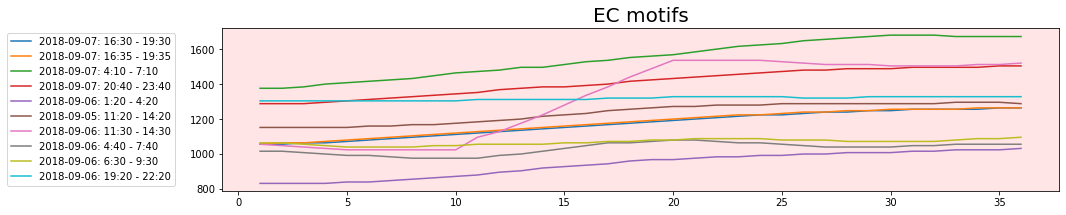

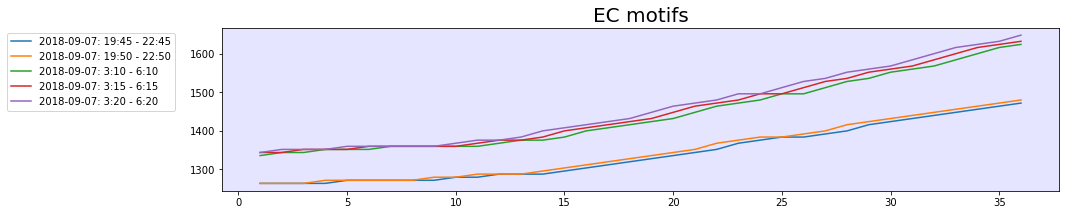

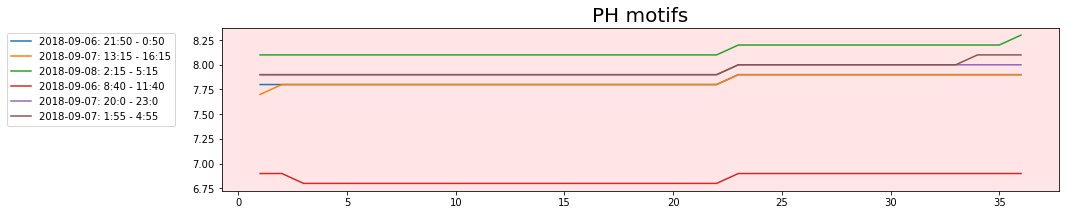

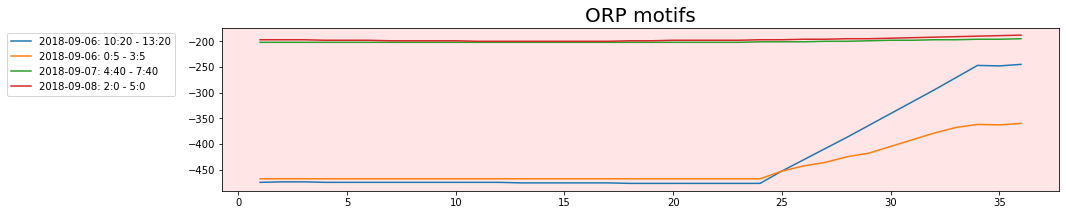

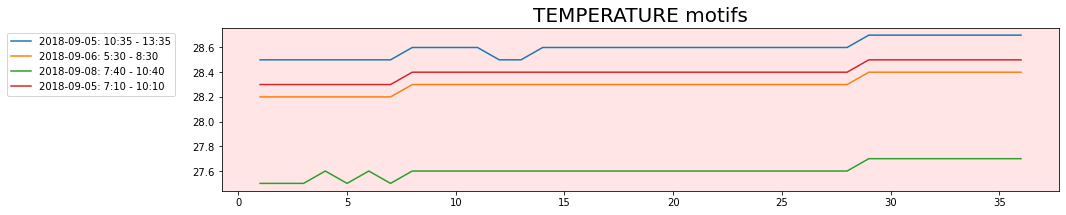

In [27]:
for col in cols_for_matrix_profile:
    groups = discover_motifs_groups(mps[f'mp_{col}'], THRESHOLD)
    plot_groups(df, groups, f'{col}', WINDOW)

In [28]:
EC_mp12 = np.load('EC_mp12.npy', allow_pickle=True)

In [32]:
PH_mp12 = np.load('PH_mp12.npy', allow_pickle=True)

In [30]:
ORP_mp12 = np.load('ORP_mp12.npy', allow_pickle=True)

In [31]:
TEMPERATURE_mp12 = np.load('TEMPERATURE_mp12.npy', allow_pickle=True)

In [36]:
df_hotels = pd.read_pickle("./Israel_hotels_sector.pkl")

In [42]:
df_hotels.shape

(1953387, 13)

In [34]:
mps = {'mp_EC': EC_mp12,
       'mp_PH': PH_mp12,
       'mp_ORP': ORP_mp12,
       'mp_TEMPERATURE': TEMPERATURE_mp12}

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


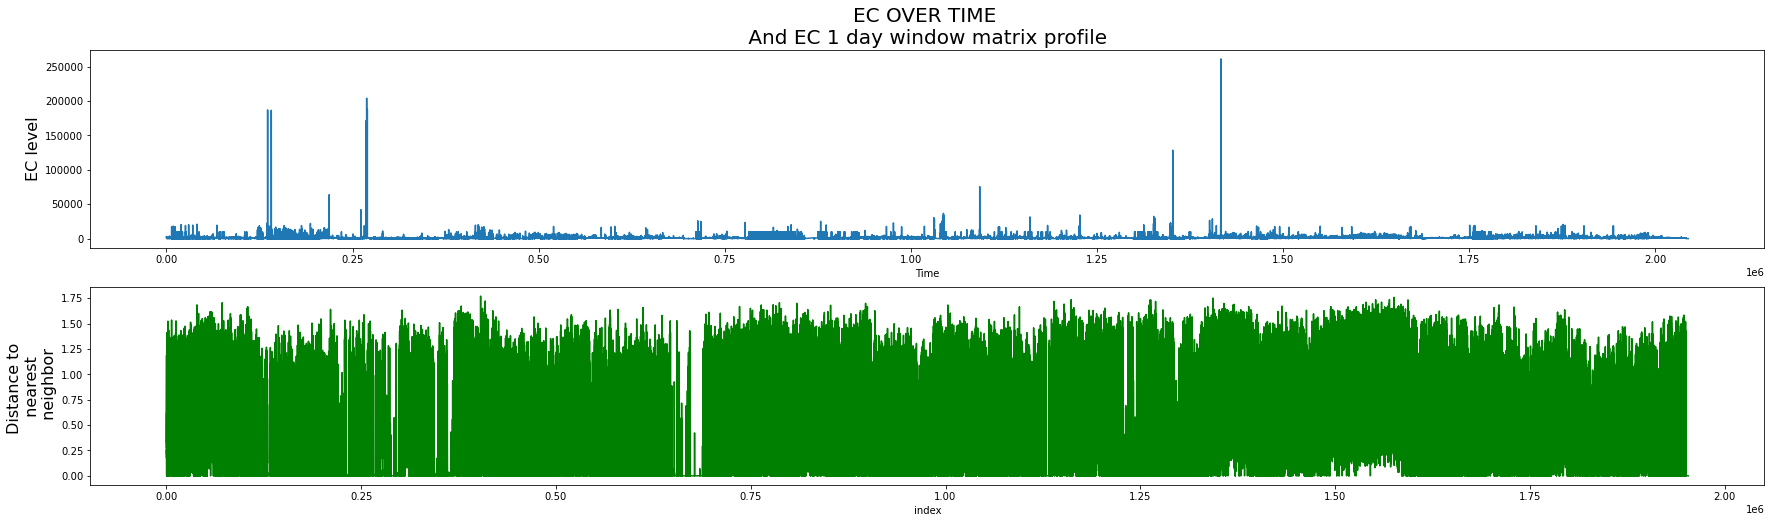

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


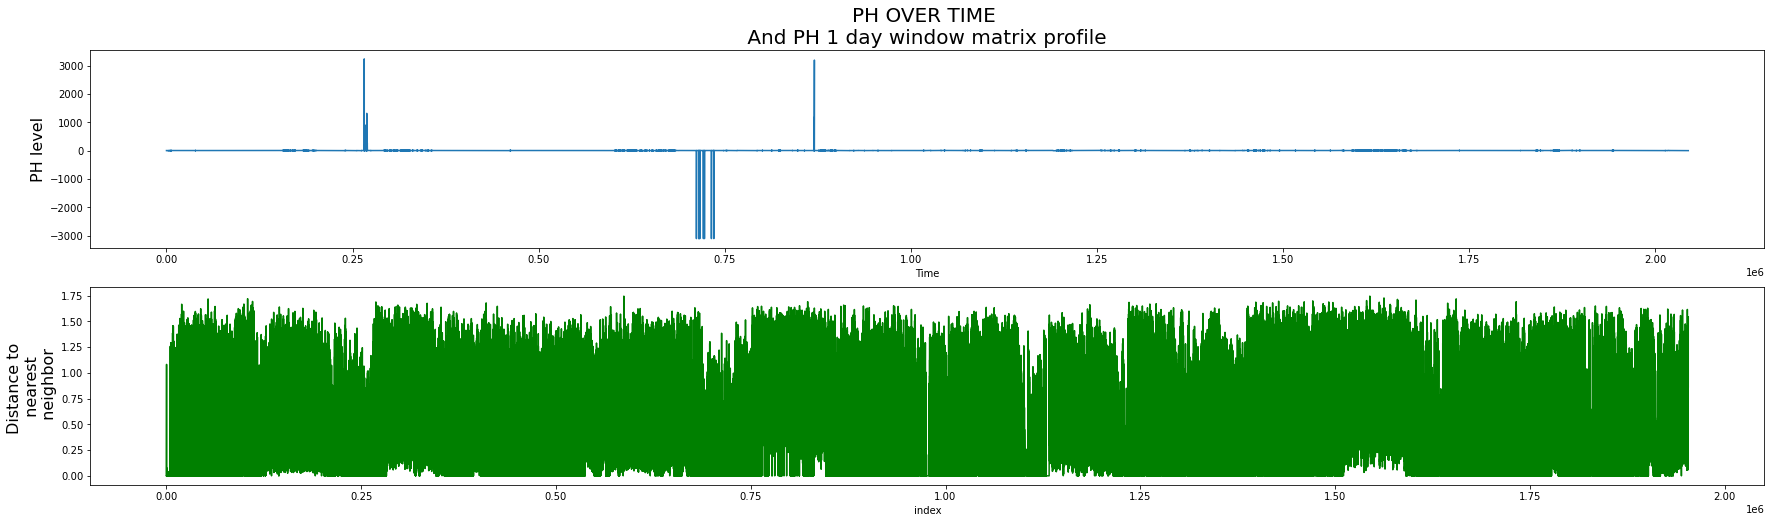

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


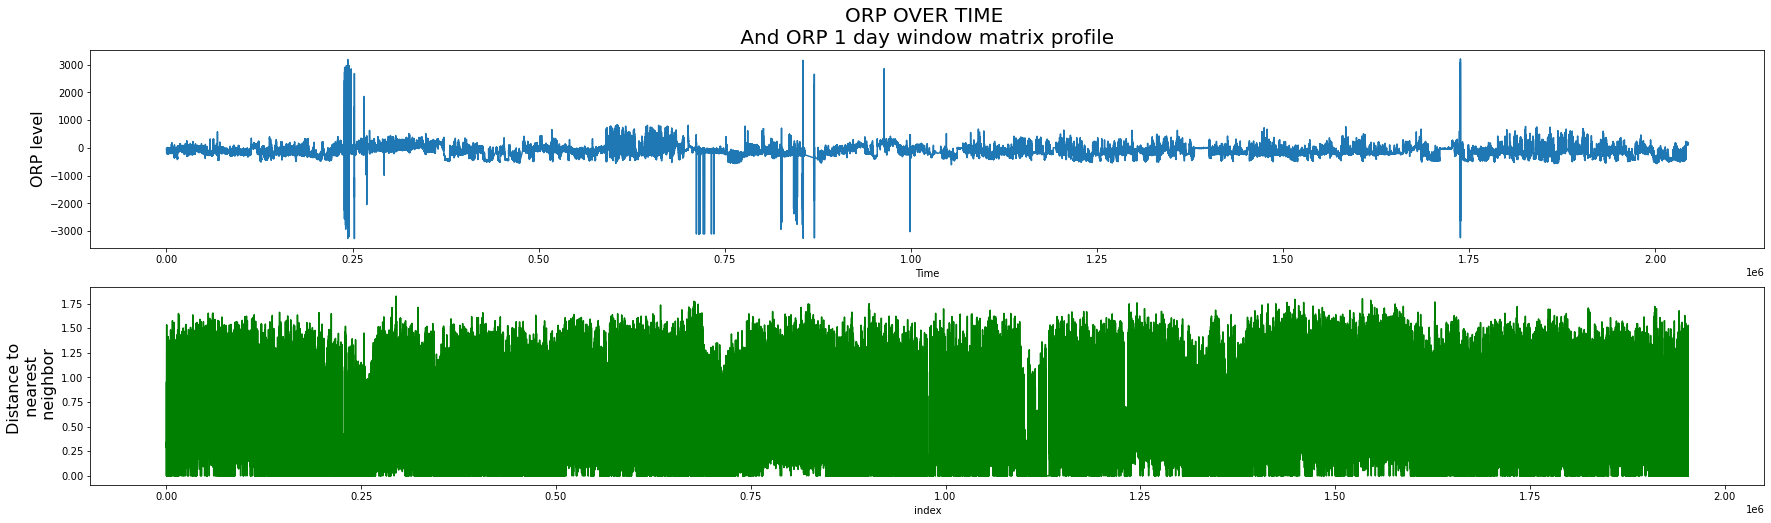

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


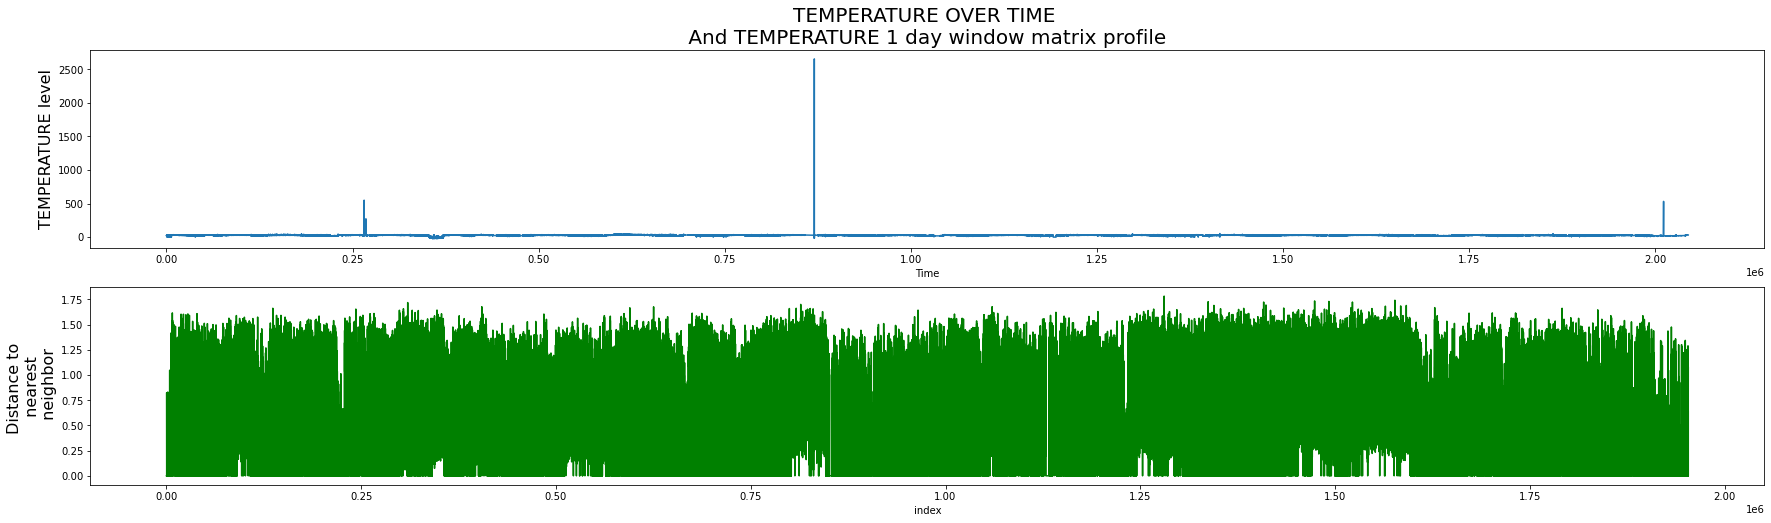

In [39]:
plot_univariant_matrix_profiles_dictionary(df_hotels, mps, cols_for_matrix_profile)

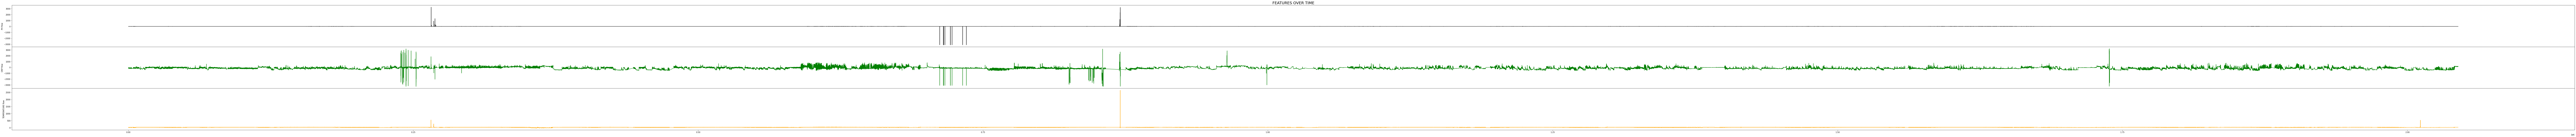

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 17280x864 with 2 Axes>

AttributeError: 'numpy.int64' object has no attribute 'date'

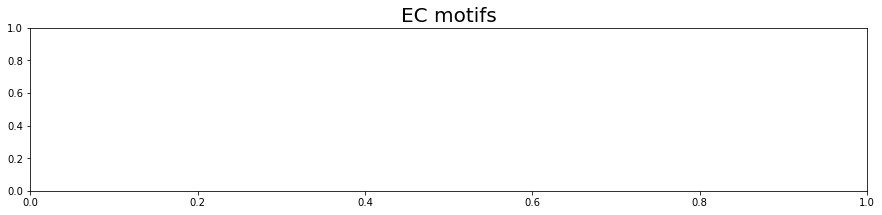

In [40]:
plot_univariant_matrix_profiles_and_motifs(df_hotels, mps, cols_for_matrix_profile, WINDOW, threshold=THRESHOLD)

KeyError: 'All_dimensions'

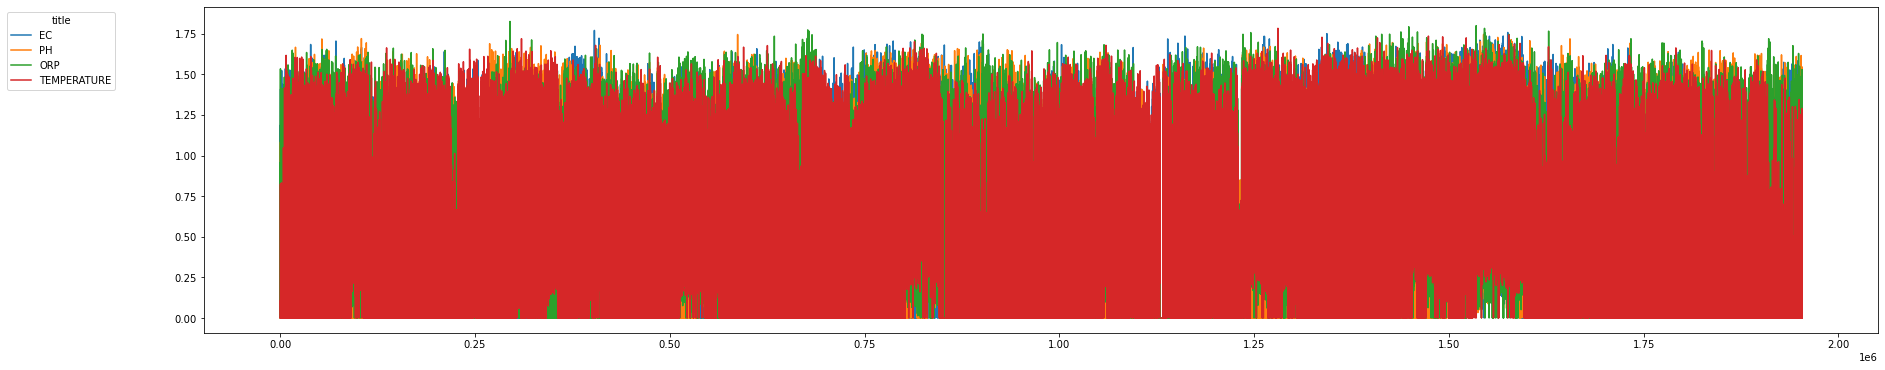

In [41]:
plot_multi_variant_matrix_profile(mps, cols_for_matrix_profile)

In [ ]:
plot_anomalities(df_hotels, mps, cols_for_matrix_profile, WINDOW)

In [ ]:
for col in cols_for_matrix_profile:
    groups = discover_motifs_groups(mps[f'mp_{col}'], THRESHOLD)
    plot_groups(df_hotels, groups, f'{col}', WINDOW)